In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('dataset.csv');
df

,Year,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1872,13.0,8.9,294.4,735.3,879.1,2632.7,3277.9,1359.9,2577.8,348.5,9.4,0.0
1,1873,5.3,105.2,290.8,455.7,339.3,2256.0,1804.4,1338.8,551.9,24.6,0.0,16.0
2,1874,27.2,118.4,278.6,719.6,2449.3,1632.5,2923.5,1152.1,1218.2,204.0,9.4,0.0
3,1875,70.4,20.1,176.3,1380.5,578.6,3407.7,2237.5,2128.5,365.8,12.7,0.0,0.0
4,1876,0.0,41.4,446.3,810.5,1368.0,4693.9,2016.0,1651.5,493.5,400.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2004,4.0,13.0,1234.0,1365.0,1678.0,4775.0,498.0,947.0,1917.0,28.0,NaN,NaN
133,2005,6.0,27.0,524.0,560.0,625.0,2205.0,2343.0,2262.0,314.0,490.0,0.0,0.0
134,2006,0.0,75.0,908.0,2120.0,2310.0,1341.0,699.0,986.0,21.0,27.0,7.0,NaN
135,2007,1.0,131.0,22.0,800.0,1081.0,2601.0,4133.0,974.0,1958.0,728.0,0.0,NaN


In [4]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

%matplotlib inline

import itertools
import warnings
warnings.filterwarnings('ignore')

In [5]:
df['Jan'].fillna((df['Jan'].mean()), inplace=True)
df['Feb'].fillna((df['Feb'].mean()), inplace=True)
df['March'].fillna((df['March'].mean()), inplace=True)
df['April'].fillna((df['April'].mean()), inplace=True)
df['May'].fillna((df['May'].mean()), inplace=True)
df['June'].fillna((df['June'].mean()), inplace=True)
df['July'].fillna((df['July'].mean()), inplace=True)
df['Aug'].fillna((df['Aug'].mean()), inplace=True)
df['Sep'].fillna((df['Sep'].mean()), inplace=True)
df['Oct'].fillna((df['Oct'].mean()), inplace=True)
df['Nov'].fillna((df['Nov'].mean()), inplace=True)
df['Dec'].fillna((df['Dec'].mean()), inplace=True)

<Axes: >

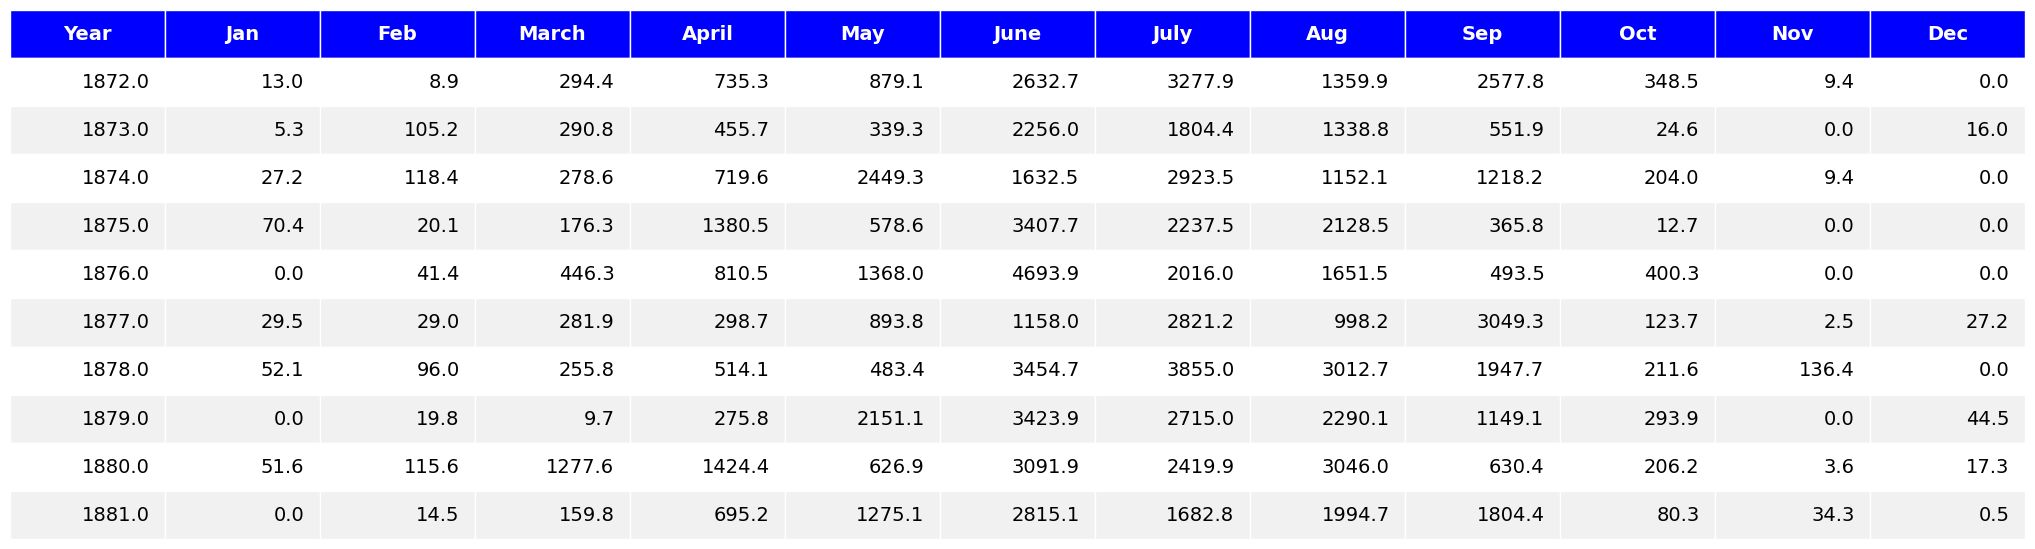

In [6]:
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#0000ff', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df.head(10).round(3), header_columns=0, col_width=2.0)

In [7]:
df.set_index('Year', inplace=True)
df.head()

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1872,13.0,8.9,294.4,735.3,879.1,2632.7,3277.9,1359.9,2577.8,348.5,9.4,0.0
1873,5.3,105.2,290.8,455.7,339.3,2256.0,1804.4,1338.8,551.9,24.6,0.0,16.0
1874,27.2,118.4,278.6,719.6,2449.3,1632.5,2923.5,1152.1,1218.2,204.0,9.4,0.0
1875,70.4,20.1,176.3,1380.5,578.6,3407.7,2237.5,2128.5,365.8,12.7,0.0,0.0
1876,0.0,41.4,446.3,810.5,1368.0,4693.9,2016.0,1651.5,493.5,400.3,0.0,0.0


In [8]:
df=df.transpose()
df

Year,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Jan,13.0,5.3,27.2,70.4,0.0,29.5,52.1,0.0,51.6,0.0,...,0.0,28.000000,27.000000,40.000000,5.0,4.000000,6.0,0.000000,1.000000,48.000000
Feb,8.9,105.2,118.4,20.1,41.4,29.0,96.0,19.8,115.6,14.5,...,0.0,1314.000000,2021.000000,1.000000,24.0,13.000000,27.0,75.000000,131.000000,80.493182
March,294.4,290.8,278.6,176.3,446.3,281.9,255.8,9.7,1277.6,159.8,...,44.0,1762.000000,2519.000000,316.000000,163.0,1234.000000,524.0,908.000000,22.000000,316.542308
April,735.3,455.7,719.6,1380.5,810.5,298.7,514.1,275.8,1424.4,695.2,...,125.0,327.000000,1097.000000,3843.000000,406.0,1365.000000,560.0,2120.000000,800.000000,789.878462
May,879.1,339.3,2449.3,578.6,1368.0,893.8,483.4,2151.1,626.9,1275.1,...,1221.0,1638.000000,542.000000,3100.000000,374.0,1678.000000,625.0,2310.000000,1081.000000,1350.040945
June,2632.7,2256.0,1632.5,3407.7,4693.9,1158.0,3454.7,3423.9,3091.9,2815.1,...,1355.0,2731.000000,27.000000,1291.000000,3222.0,4775.000000,2205.0,1341.000000,2601.000000,2520.403200
July,3277.9,1804.4,2923.5,2237.5,2016.0,2821.2,3855.0,2715.0,2419.9,1682.8,...,2832.0,1040.000000,0.000000,947.000000,2927.0,498.000000,2343.0,699.000000,4133.000000,2446.588000
Aug,1359.9,1338.8,1152.1,2128.5,1651.5,998.2,3012.7,2290.1,3046.0,1994.7,...,1427.0,275.000000,1673.929032,69.000000,1060.0,947.000000,2262.0,986.000000,974.000000,1673.929032
Sep,2577.8,551.9,1218.2,365.8,493.5,3049.3,1947.7,1149.1,630.4,1804.4,...,402.0,1059.699180,1059.699180,1.000000,542.0,1917.000000,314.0,21.000000,1958.000000,1059.699180
Oct,348.5,24.6,204.0,12.7,400.3,123.7,211.6,293.9,206.2,80.3,...,627.0,400.368333,400.368333,400.368333,651.0,28.000000,490.0,27.000000,728.000000,400.368333


<Axes: >

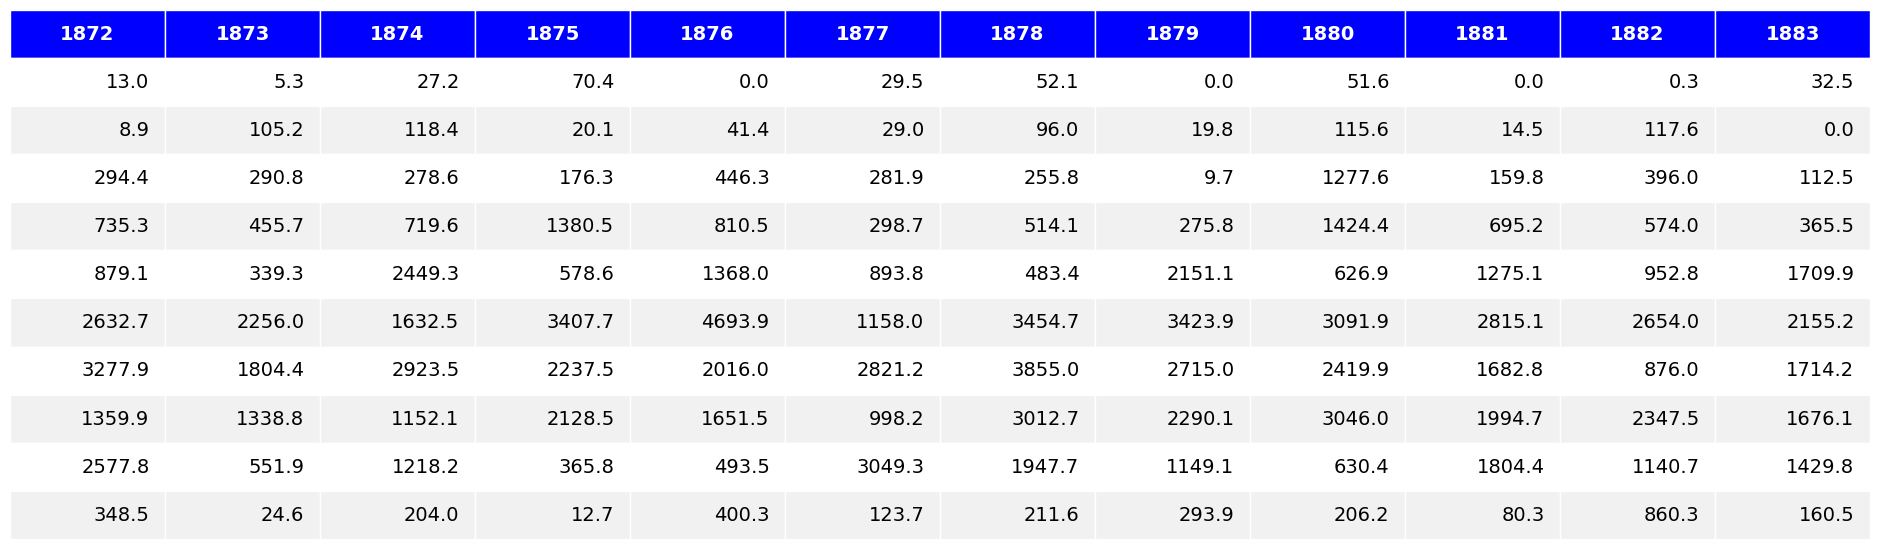

In [9]:
render_mpl_table(df.iloc[:,0:12].head(10).round(3), header_columns=0, col_width=2.0)

In [10]:
dates = pd.date_range(start='1872-01', freq='MS', periods=len(df.columns)*12)
len(dates)

1644

Text(0.5, 1.0, 'Month vs mean precipitation across all years')

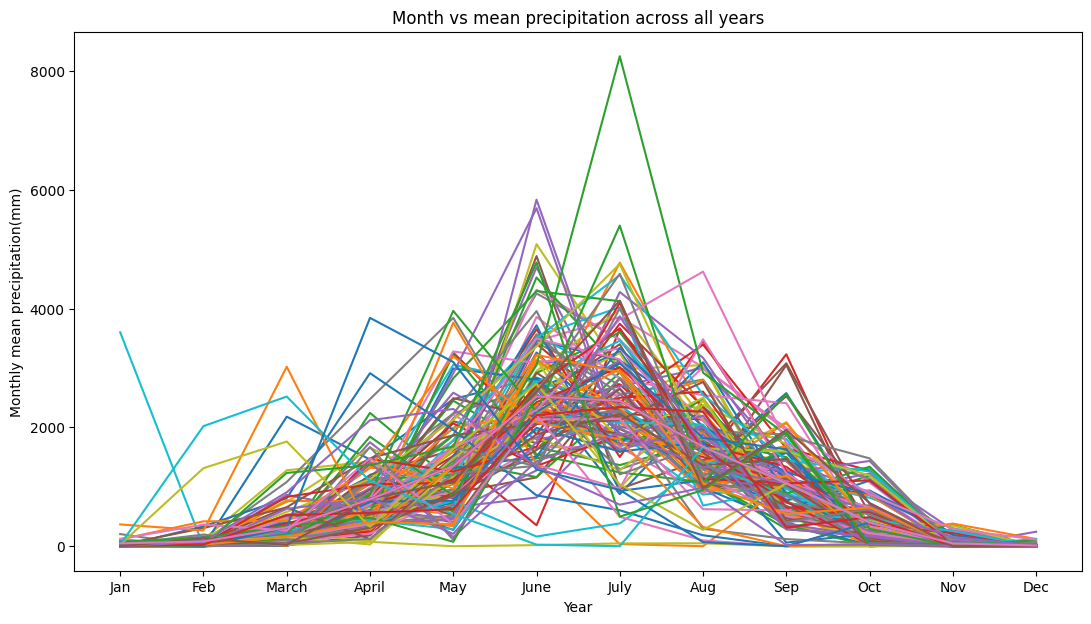

In [11]:
plt.figure(figsize=(13,7))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Monthly mean precipitation(mm)')
plt.title('Month vs mean precipitation across all years')

Text(0.5, 1.0, 'Month vs Precipitation across all years')

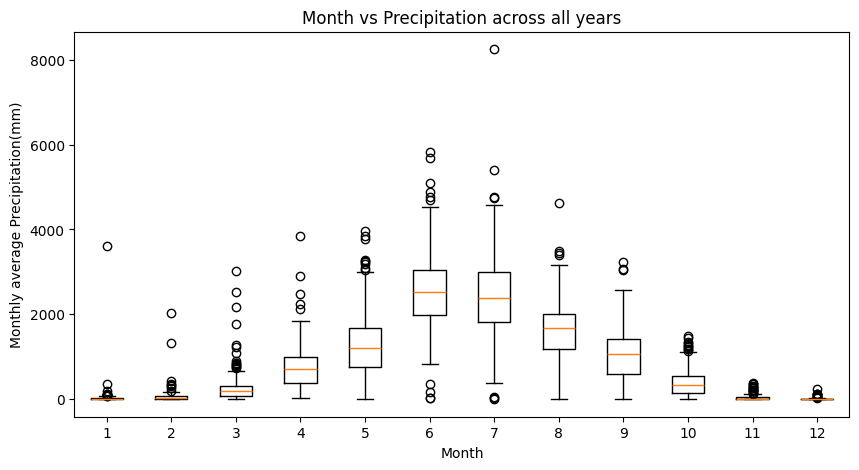

In [12]:
plt.figure(figsize=(10,5))
plt.boxplot(df.transpose())
plt.xlabel('Month')
plt.ylabel('Monthly average Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

In [13]:
average_rainfall_year = pd.DataFrame({'average_rainfall_year': df.mean(axis=0)})
average_rainfall_year = average_rainfall_year.transpose()
average_rainfall_year.head()

Year,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
average_rainfall_year,1011.408333,599.0,894.4,864.841667,993.45,809.416667,1168.291667,1031.075,1075.95,879.725,...,669.75,886.307368,785.634787,839.082436,782.666667,1043.301742,779.666667,708.87254,1036.789206,895.546962


In [14]:
rainfall_data_matrix_np = df.transpose().values

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [15]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)
rainfall_data.index.name = 'Month'
rainfall_data.head()

,Precipitation
Month,
1872-01-01,13.0
1872-02-01,8.9
1872-03-01,294.4
1872-04-01,735.3
1872-05-01,879.1


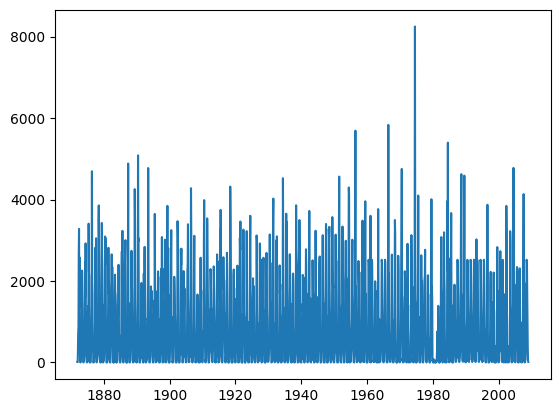

In [16]:
plt.plot(rainfall_data)

In [17]:
len(rainfall_data)

1644

In [18]:
train=rainfall_data.iloc[:1632]
test=rainfall_data.iloc[1632:]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [20]:
rainfall_data.head(),rainfall_data.tail()

(            Precipitation
 Month                    
 1872-01-01           13.0
 1872-02-01            8.9
 1872-03-01          294.4
 1872-04-01          735.3
 1872-05-01          879.1,
             Precipitation
 Month                    
 2008-08-01    1673.929032
 2008-09-01    1059.699180
 2008-10-01     400.368333
 2008-11-01      48.150427
 2008-12-01      12.470476)

In [21]:
scalar.fit(train)
scaled_train = scalar.transform(train)
scaled_test = scalar.transform(test)

In [22]:
scaled_train[:10]

array([[0.00157637],
       [0.00107921],
       [0.0356987 ],
       [0.08916186],
       [0.10659892],
       [0.31923898],
       [0.39747538],
       [0.16490032],
       [0.31258185],
       [0.04225882]])

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [26]:
n_features = 1
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(generator,epochs=50)

Epoch 1/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0141
Epoch 2/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 0.0075
Epoch 3/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0072
Epoch 4/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0073
Epoch 5/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0069
Epoch 6/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0061
Epoch 7/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0064
Epoch 8/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0072
Epoch 9/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0066
Epoch 10/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0060
Epoch 11/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0060
Epoch 12/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0062
Epoch 13/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0062
Epoch 14/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0070
Epoch 

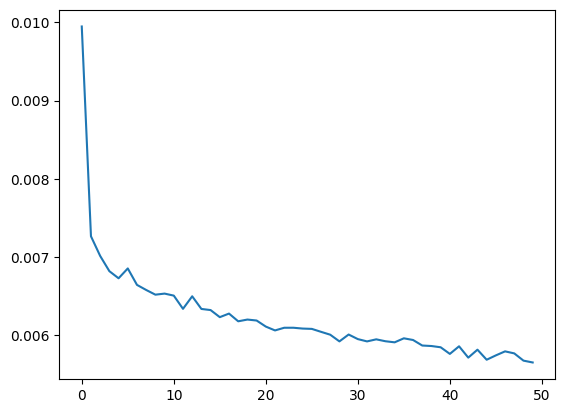

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-12:]

In [31]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [32]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


array([[-0.01741061]], dtype=float32)

In [33]:
scaled_test[0]

array([0.00582044])

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [35]:
test_predictions

[array([-0.01741061], dtype=float32),
 array([-0.01269081], dtype=float32),
 array([-0.00044523], dtype=float32),
 array([0.04319911], dtype=float32),
 array([0.11466128], dtype=float32),
 array([0.30038276], dtype=float32),
 array([0.28416997], dtype=float32),
 array([0.22465281], dtype=float32),
 array([0.14035206], dtype=float32),
 array([0.06031381], dtype=float32),
 array([-0.00140953], dtype=float32),
 array([-0.02047302], dtype=float32)]

In [36]:
true_predictions = scalar.inverse_transform(test_predictions)

In [37]:
test['Predictions'] = true_predictions

<Axes: xlabel='Month'>

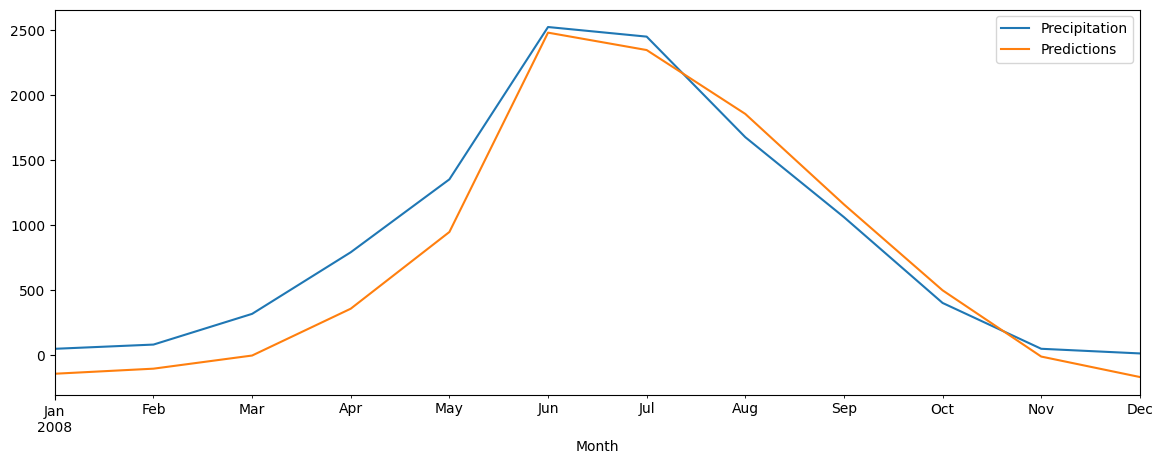

In [38]:

test.plot(figsize=(14,5))

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Precipitation'],test['Predictions']))
print(rmse)

228.216252382184


In [46]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
mape=mean_absolute_percentage_error(test['Precipitation'],test['Predictions'])
mae=mean_absolute_error(test['Precipitation'],test['Predictions'])
print(mape)
print(mae)

2.03605491591147
191.327430350174
